In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.isnull().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [4]:
df = df.dropna()
print("ROWS WITH EMPTY CELL DROPPED")
df.isnull().sum()

ROWS WITH EMPTY CELL DROPPED


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [6]:
df.loc[:,'saledate']=df['saledate'].astype(str)
print("saledate coverted to string type")
df["saledate"].head()

saledate coverted to string type


0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3    Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4    Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [7]:
df['saledate']=df['saledate'].apply(lambda x: " ",join(x.split('')[1:]))

NameError: name 'join' is not defined

In [ ]:
df.loc[:,'date']=df['saledate'].apply(lambda x:''.join(x.split('')[0:3]))
df.loc[:,'time']=df['saledate'].apply(lambda x:''.join(x.split('')[3:1]))


In [ ]:
df.drop(columns=['saledate'],inplace=True)
df.drop(columns=['time'],inplace=True)
df['year']=df['date'].str[-4]

In [ ]:
df.head()

In [ ]:
#What is the trent in vehicle sales over the years covered by the dataset?

In [8]:
df['year'] = pd.to_datetime(df['saledate']).dt.year

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11784\3875365606.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year'] = pd.to_datetime(df['saledate']).dt.year


TypeError: unhashable type: 'tzoffset'

In [9]:
yearly_sales = df.groupby('year')['sellingprice'].sum()

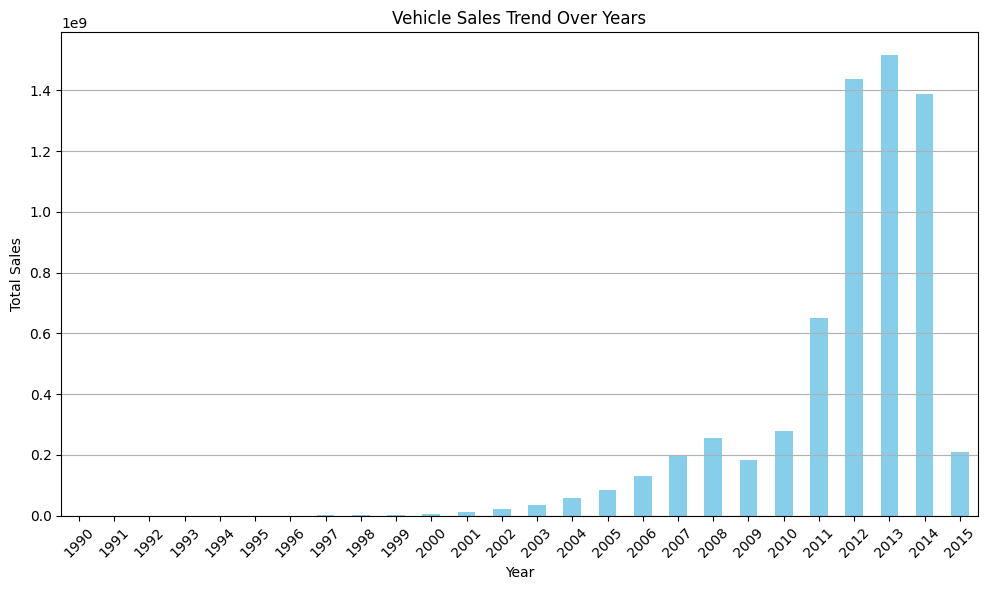

In [10]:
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Vehicle Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#which vehicle brand/models are the top sellers overall?

In [13]:

top_sellers = df.groupby(['make', 'model'])['sellingprice'].sum().reset_index()

In [12]:
top_sellers = top_sellers.sort_values(by='sellingprice', ascending=False)
print("Top Selling Vehicle Brands/Models:")
print(top_sellers.head(10))

Top Selling Vehicle Brands/Models:
          make           model  sellingprice
249       Ford           F-150   234075458.0
585     Nissan          Altima   185526400.0
240       Ford          Escape   152221961.0
262       Ford          Fusion   149659420.0
358   Infiniti         G Sedan   138470106.0
706     Toyota           Camry   126208482.0
246       Ford        Explorer   123307242.0
45         BMW        3 Series   121280995.0
239       Ford            Edge    95921657.0
155  Chevrolet  Silverado 1500    95777596.0


<Figure size 1200x600 with 0 Axes>

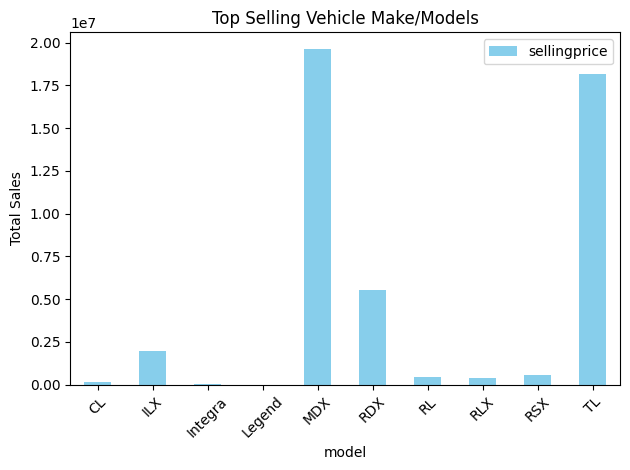

In [14]:
plt.figure(figsize=(12,6))
top_sellers.head(10).plot(kind='bar',x='model',y='sellingprice',color='skyblue')
plt.title('Top Selling Vehicle Make/Models')
plt.xlabel('model')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#is there seasonal pattern in vehicle sales?

In [15]:
df['saledate'] = pd.to_datetime(df['saledate'])

# Extract month and year from the 'saledate' column
df['month'] = df['saledate'].dt.month
df['year'] = df['saledate'].dt.year

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11784\1842978853.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'])


TypeError: unhashable type: 'tzoffset'

In [16]:
monthly_sales = df.groupby(['year', 'month'])['sellingprice'].sum().reset_index()

KeyError: 'month'

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['saledate'], monthly_sales['sellingprice'], marker='o')
plt.title('Vehicle Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'monthly_sales' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
#what is the average selling price of vehicle in the dataset based on model/brands?

In [18]:
average_price_by_model = df.groupby('model')['sellingprice'].mean().reset_index()
average_price_by_brand = df.groupby('make')['sellingprice'].mean().reset_index()

In [19]:
print("Average Selling Price by Model:")
print(average_price_by_model)

print("\nAverage Selling Price by Brand:")
print(average_price_by_brand)

Average Selling Price by Model:
         model  sellingprice
0     1 Series  19247.038567
1         1500  22770.766737
2    190-Class    708.333333
3     2 Series  38490.625000
4          200  10955.510094
..         ...           ...
763        mdx  23000.000000
764         tC   9337.909516
765         xA   2823.809524
766         xB   8018.591224
767         xD   9288.235294

[768 rows x 2 columns]

Average Selling Price by Brand:
             make   sellingprice
0           Acura   13104.780147
1    Aston Martin   55500.000000
2            Audi   20010.167638
3             BMW   21290.043863
4         Bentley   72713.333333
5           Buick   10588.182103
6        Cadillac   14733.198892
7       Chevrolet   11866.210434
8        Chrysler   10627.087887
9          Daewoo     450.000000
10          Dodge   10963.794342
11           FIAT    9927.416552
12        Ferrari  128852.941176
13         Fisker   46461.111111
14           Ford   14829.809413
15            GMC   16769.467831
16

In [ ]:
#how does the sales performance very acorss different regions/countries?

In [20]:
sales_by_region = df.groupby('state')['sellingprice'].sum().reset_index()
avg_price_by_region = df.groupby('state')['sellingprice'].mean().reset_index()

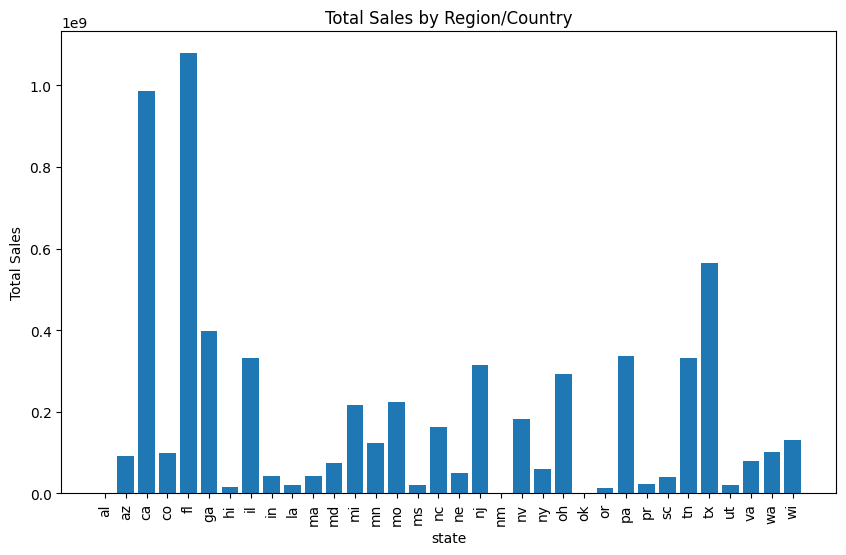

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['state'], sales_by_region['sellingprice'])
plt.xlabel('state')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region/Country')
plt.xticks(rotation=90)
plt.show()

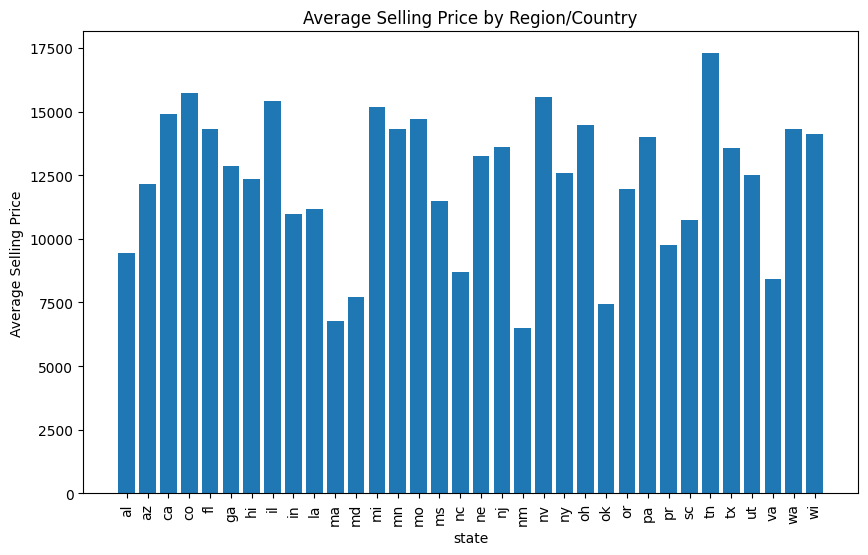

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_region['state'], avg_price_by_region['sellingprice'])
plt.xlabel('state')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Region/Country')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#what are the most popular types of vehicles (sedans,SUVs,trucks,etc) in term of sales volume?

In [23]:
sales_by_type = df.groupby('body')['sellingprice'].sum().reset_index()
sales_by_type = sales_by_type.sort_values(by='sellingprice', ascending=False)


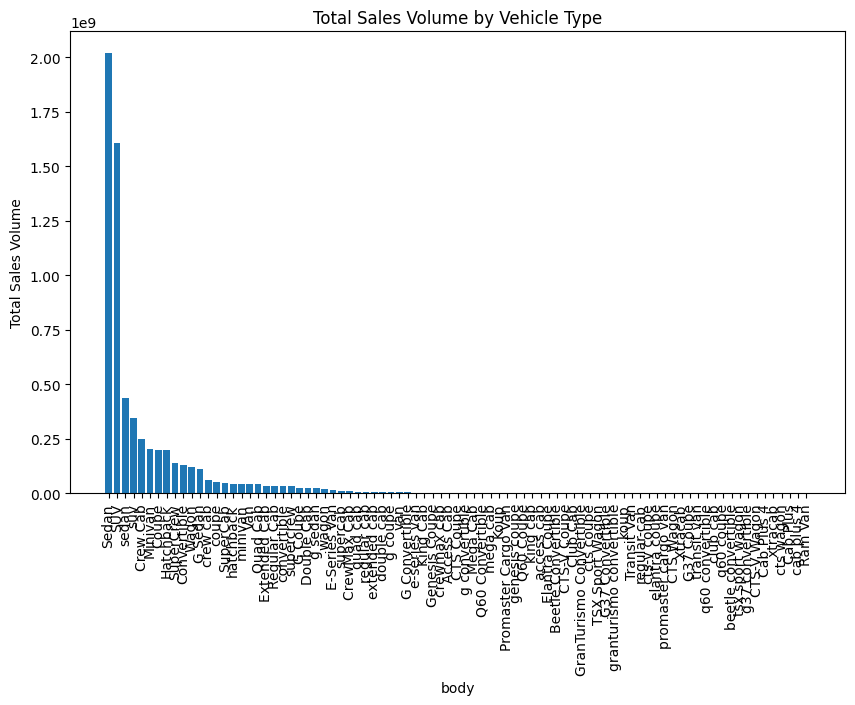

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_type['body'], sales_by_type['sellingprice'])
plt.xlabel('body')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Vehicle Type')
plt.xticks(rotation=90)
plt.show()

In [25]:
most_popular_types = sales_by_type.head(5)
print("Most popular vehicle types based on sales volume:")
print(most_popular_types)

Most popular vehicle types based on sales volume:
        body  sellingprice
36     Sedan  2.017887e+09
35       SUV  1.608047e+09
76     sedan  4.396518e+08
79       suv  3.454487e+08
11  Crew Cab  2.476974e+08


In [ ]:
#how does the odometer reading affect the selling price of vehicles?

In [26]:
odometer_sellingprice = df[['odometer', 'sellingprice']]

Correlation Coefficient between Odometer and Selling Price: -0.5773969284272915


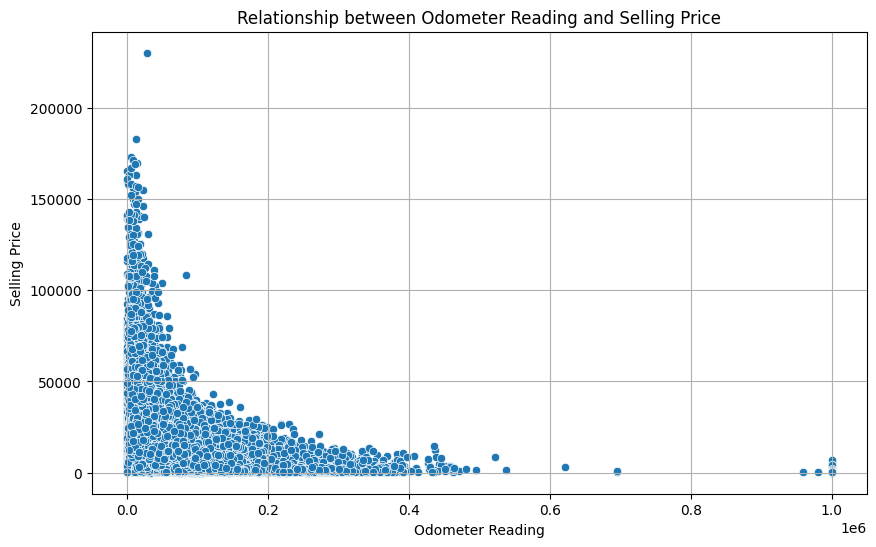

In [27]:
correlation = odometer_sellingprice.corr().iloc[0, 1]
print("Correlation Coefficient between Odometer and Selling Price:", correlation)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=odometer_sellingprice, x='odometer', y='sellingprice')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.title('Relationship between Odometer Reading and Selling Price')
plt.grid(True)
plt.show()

In [ ]:
#how does the manheim market report (MMR) value correlate with the actual selling price of vehicles?

In [28]:
correlation = df['mmr'].corr(df['sellingprice'])

print(f"Correlation coefficient between MMR and Selling Price: {correlation}")

Correlation coefficient between MMR and Selling Price: 0.9834931745325883
